<a href="https://colab.research.google.com/github/marcosilvaa/portfolio/blob/main/Analisando_dados_do_Airbnb_Nova_Iorque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Nova Iorque*

O [Airbnb](https://www.airbnb.com.br/) é uma Startup fundada em 2018 que já **hospedou mais de 300 milhões** de pessoas ao redor do mundo, considerada a maior empresa hoteleira da atualidade, sem possuir nenhum hotel.

A proposta da Startup é conectar viajantes que buscam uma hospedagem com o melhor custo benefício, com os anfitriões que desejam alugar seus imóveis, tudo isso de forma **rápida, prática e segura** para ambos os lados.

Para contribuir com o universo da ciência de dados, o **Airbnb** tomou a iniciativa de tornar público os dados do site referente às principais cidades ao redor do mundo. Através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Nova Iorque, e ver o que os dados brutos nos entregam após serem tratados e analisados.**

## Obtenção dos Dados

Os dados utilizados foram encontrados no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para realizar a análise exploratória, iremos usar o arquivo:

* `listings.csv` - Summary information and metrics for listings in New York City (good for visualisations).


In [ ]:
# instalando ferramentas necessárias
!pip install pywaffle -q

In [ ]:
!pip install wordcloud -q

In [ ]:
# importando pacotes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-12-10/visualisations/listings.csv")

## Análise dos Dados

Agora vamos conhecer a situação atual dos dados e entender sua estrutura.

Para darmos início na nossa análise, vamos verificar a cara do nosso *dataset*, conferindo as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,30,48,2019-11-04,0.36,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,74,1,375,2020-11-22,4.97,1,307
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.36,1,365
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,65,2,474,2020-09-25,3.36,1,0
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.86,1,0


**Dicionário de Variáveis**

Para facilitar a compreensão dos dados, o dicionário de variáveis nos entrega o significado de cada uma das colunas presentes do *dataset*.

*  `id` - Número de Id gerado para identificar o imóvel.
*  `name` - Nome do imóvel anunciado
*  `host_id` - Número de Id gerado para identificar o anfitrião.
*  `host_name` - Nome do anfitrião.
*  `neighbourhood_group` - Nome do distrito.
*  `neighbourhood` - Nome do Bairro
*  `latitude` - Coordenada geográfica referente à latitude do imóvel.
*  `longitude` - Coordenada geográfica referente à longitude do imóvel.
*  `room_type` - Tipo do quarto/imóvel.
*  `price` - Preço da diária.
*  `minimum_nights` - Minimo de noites exigidas para locar o imóvel.
*  `number_of_reviews` - Número de avaliação do imóvel.
*  `last_reviw` - Data da última avaliação feita no imóvel.
*  `reviews_per_month` - Quantidade de avaliações mensais do imóvel.
*  `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião.
*  `availability_365` - Quantidade de dias disponíveis em 365 dias. 



## Identificando os dados e seus atributos.

Para darmos continuidade na nossa análise, vamos identificar a quantidade de entradas do nosso *dataset*, assim como conferir os tipos de cada uma das colunas.

In [ ]:
# identificando o volume de dados do DataFrame 
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}'.format(df.shape[1]))
print('')

# conferindo os tipos de dados das variáveis
display(df.dtypes)

Entradas:	 36923
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Por estarmos trabalhando com um *Dataset* de versão resumida, ele nos entrega uma quantidade reduzida de dados. Neste caso ele nos entrega um total de 36923 entradas, com 16 variáveis. 

No site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) encontra-se o arquivo `listings.csv.gz` que contém os dados completos, permitindo uma análise mais detalhada.



## Qual a porcentagem de valores ausentes no *dataset*?

A qualidade de um *dataset* esta relacionada à qualidade dos dados presentes. É importante ter conhecimento de quais dados estão ausentes, assim como sua quantidade em relação ao número total de entradas, pois influenciará no resultado final da análise.


In [ ]:
# listar as variáveis e mostrar a quantidade de valores ausentes.
df.isnull().sum()

id                                   0
name                                13
host_id                              0
host_name                            9
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9384
reviews_per_month                 9384
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [ ]:
# colocando em ordem decrescente as variáveis através dos valores ausentes
# apresentando em porcentagem
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.254151
last_review                       0.254151
name                              0.000352
host_name                         0.000244
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Agora tendo conhecimento de quais colunas apresentam dados ausentes, podemos conferir que:

* As variáveis `reviews_per_month` e `last_review` apresentam 25,4% dos dados ausentes. 
* As variáveis `name` e `host_name` apresentam menos de 1% dos dados ausentes.

Para preencher este vazio que se encontra em nosso Dataset, vamos completar os dados ausentes com os valores médios das colunas `reviews_per_month` e `last_review`.



In [ ]:
# preenchendo valores ausentes com o valor médio
df.reviews_per_month.fillna(df.reviews_per_month.mean(), inplace=True)
df.number_of_reviews.fillna(df.number_of_reviews.mean(), inplace=True)

# conferindo se há dados ausentes
print(df.reviews_per_month.isnull().value_counts())
print(df.number_of_reviews.isnull().value_counts())


False    36923
Name: reviews_per_month, dtype: int64
False    36923
Name: number_of_reviews, dtype: int64


Agora que o método `isnull()` não retornou `True` em nenhuma das duas variáveis que apresentavam o maior número de dados ausentes, vamos prosseguir.

## Qual a distribuição das variáveis?

Para analisar a distribuição dos dados, vamos plotar o histograma.


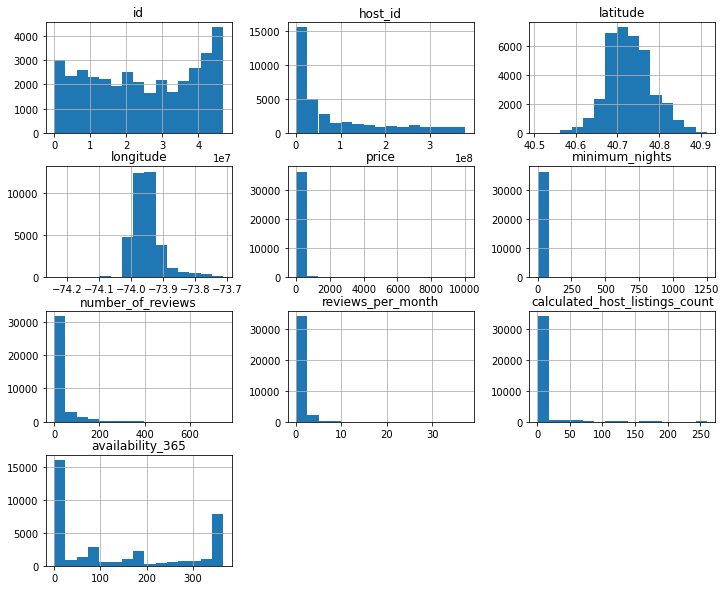

In [ ]:
# plotar histograma das variáveis numéricas
df.hist(bins=15, figsize=(12,10));

## Há Outliers presentes? 

É possível notar algumas discrepâncias através da análise dos histogramas. As variáveis `price`, `minimum_nights` os chamados *outliers*, valores que não seguem uma distribuição comum.

Para identificar com clareza se tais dados se tratam de *outliers*, há duas maneiras que nos auxiliam:

* Resumo estatístico através do método `describe()`. 
* Plotar `boxplots` para cada variavel. 


In [ ]:
# descrever as informações de todo o dataset
df[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,36923.000000,36923.000000,36923.000000,36923.000000,36923.000000,36923.000000
mean,145.921187,23.674647,23.182298,0.892762,8.947946,134.103513
std,268.388200,26.779132,48.066110,1.127721,31.080929,147.640898
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,61.000000,4.000000,0.000000,0.170000,1.000000,0.000000
50%,100.000000,30.000000,4.000000,0.840000,1.000000,77.000000
75%,159.000000,30.000000,21.000000,0.892762,2.000000,313.000000
max,10000.000000,1250.000000,748.000000,37.280000,260.000000,365.000000


Nota-se que em `price` 75% dos valores encontram-se abaixo de 159 dólares, enquanto o valor máximo é de 10.000  dólares.
Já na coluna `minimum_nights`, 50% dos valores já se encontram abaixo dos 30 dias, enquanto o máximo registrado são 1250 dias, o que nos mostra que de fato há algo de errado.

Agora vamos analisar atráves de uma boxplot.

## Boxplot para `minimum_nights`


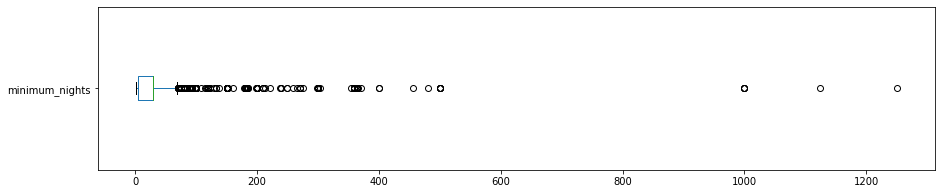

minimum_nights: Valores acima de 30 dias
1172 entradas
3.1742%


In [ ]:
# plotando box plot
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#retornando quantidade de valores acima de 30 dias
print('minimum_nights: Valores acima de 30 dias')
print('{} entradas'.format(len(df[df.minimum_nights > 30])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Como podemos observar, 1172 entradas, mais de 3% dos dados referente à `minimum_nights` estão fora do padrão, classificando-se como *Outliers*

## Boxplot para `price`

De acordo com o resumo estatístico obtido pelo método `describe()`, 75% dos valores do nosso DataSet encontram-se abaixo de 159,00 dólares enquanto o valor máximo encontra-se na casa dos 10.000,00 dólares. 

Como a cidade analisada é também conhecida pelo seu alto custo de vida, vou filtrar nossa busca por `price` na casa dos 800,00 dólares, valor equivalente a 5 vezes acima dos 75% imóveis cadastrados.


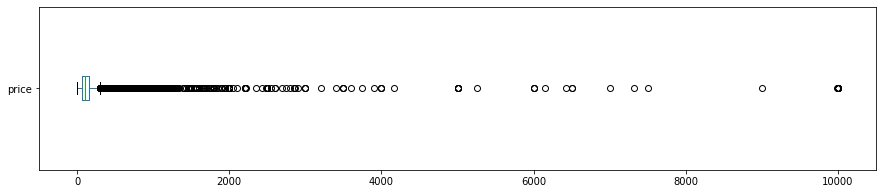

price: Valores acima de 800,00
423 entradas
1.1456%


In [ ]:
#plotando boxplot
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# retornando a quantidade de valores acima de 800,00 dólares

print('price: Valores acima de 800,00')
print('{} entradas'.format(len(df[df.price > 800])))
print('{:.4f}%'.format((len(df[df.price > 800]) / df.shape[0])*100))

Como podemos observar, pouco mais de 1% dos dados encontram-se nesta categoria.

Vamos agora tratar nossos dados e limpar os *outliers* presentes.

## Removendo *Outliers* 

Após ter encontrado *outliers* nas colunas `price` e `minimum_nights`, vamos agora limpar nosso Dataset para então plotar novamente um histograma e conferirmos quais as mudanças.

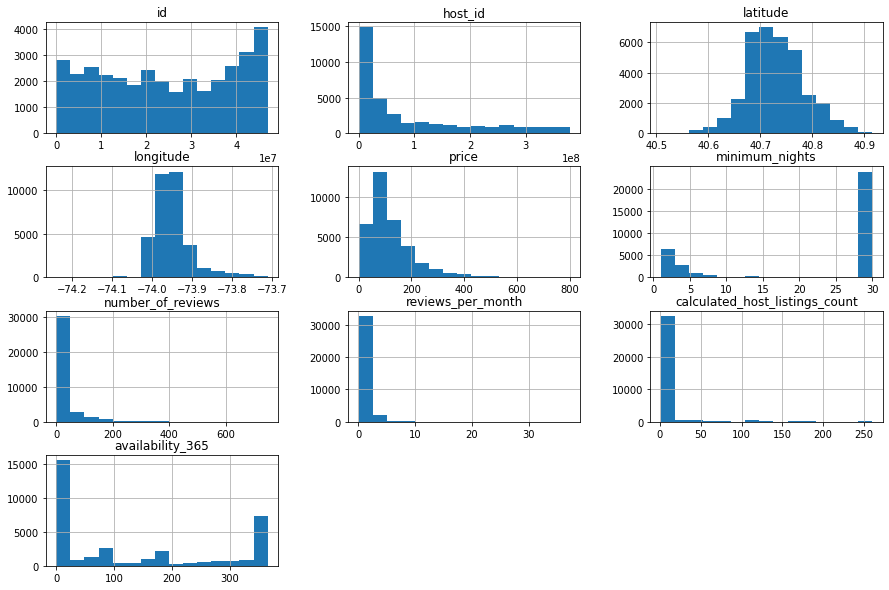

In [185]:
# criando cópia do DataFrame
df_clean = df.copy()

# removendo dados da coluna price
df_clean.drop(df_clean[df_clean.price > 800].index, axis=0, inplace=True)

# removendo dados da coluna minimum_nights
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotando novo histograma
df_clean.hist(bins=15, figsize=(15,10))
plt.show()

## Qual a correlação existente entre as variáveis?

Correlação é nada mais nada menos do que a relação entre pares de dados.

Há meios de se medir essa correlação, e é função do coeficiente de correlacão estabelecer qual a intensidade. Para identificar estas correlações vamos:

* Criar uma Matriz de correlação,
* Gerar um *HeatMap* desta matriz através da biblioteca `Seaborn`

In [186]:
# criando uma Matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'reviews_per_month', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,reviews_per_month,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,-0.001667,-0.045301,-0.044999,-0.006273,0.047934
minimum_nights,-0.001667,1.000000,-0.339180,-0.243988,0.123791,-0.148461
reviews_per_month,-0.045301,-0.339180,1.000000,0.677844,-0.033151,0.176356
number_of_reviews,-0.044999,-0.243988,0.677844,1.000000,-0.100625,0.157526
calculated_host_listings_count,-0.006273,0.123791,-0.033151,-0.100625,1.000000,0.187632
availability_365,0.047934,-0.148461,0.176356,0.157526,0.187632,1.000000


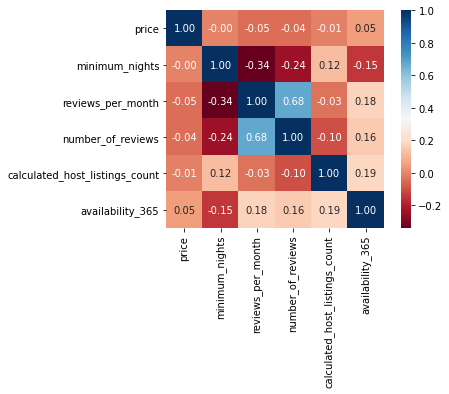

In [187]:
# plotando Heatmap através das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='White', annot=True);

### **Qual o tipo de imóvel mais alugado no Airbnb?** 

A variável `room_type` indica o tipo de quarto que está sendo oferecido, podendo ser: 
    
* Apartamento completo
* Quarto único
* Quarto compartilhado
* Quarto de hotel

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, utilizando o método `value_counts()`.


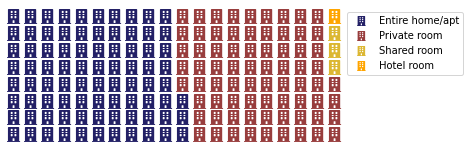

Entire home/apt    18396
Private room       16047
Shared room          644
Hotel room           273
Name: room_type, dtype: int64


In [188]:
# mostrar a quantidade de cada tipo de imóvel

data = dict(df_clean['room_type'].value_counts())

fig = plt.figure(
    FigureClass=Waffle,
    rows=8,
    columns=20,
    colors=("#232066", "#983D3D", "#DCB732", "#FFA500"),
    values = data,
    icons= 'building',
    icon_size = 15,
    icon_legend=True,
    legend={
        'labels': ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1)
    }
)
fig.set_tight_layout(False)
plt.show();
print(df_clean.room_type.value_counts())

In [189]:
# mostrando a porcentagem de cada tipo de imóvel disponível
print('A seguir, o percentual de cada tipo de imóvel disponível:')
print(df_clean.room_type.value_counts()/ df_clean.shape[0]*100)

A seguir, o percentual de cada tipo de imóvel disponível:
Entire home/apt    52.024887
Private room       45.381787
Shared room         1.821267
Hotel room          0.772059
Name: room_type, dtype: float64


**A privacidade é aquilo que se busca**.

Como pode ser visto no gráfico acima, os preços tendem a cair de acordo com a privacidade adquirida. 
52% dos imóveis são apartamentos completos, e em segundo lugar com 45% de disponibilidade encontram-se os quartos privados. 

## Qual a localidade mais cara do *Dataset*?

Na hora de se programar para uma viagem, os custos com acomodação englobam boa parte dos gastos, ainda mais quando se trata de Nova Iorque, considerado o terceiro metro quadrado mais caro do mundo de acordo com a [Forbes](https://forbes.com.br/fotos/2018/03/20-cidades-com-o-metro-quadrado-mais-caro-do-mundo-2/#foto18).

Primeiro vamos conferir quais os distritos (`neighbourhood_group`) mais caros, para então aprofundarmos nossa análise.

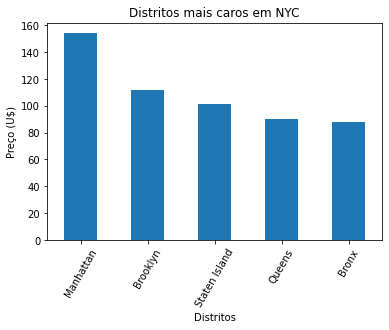

neighbourhood_group
Manhattan        154.373958
Brooklyn         111.850376
Staten Island    101.660517
Queens            89.811081
Bronx             87.927095
Name: price, dtype: float64


In [190]:
# plotando gráfico com os distritos mais caros
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Distritos mais caros em NYC')
plt.xlabel('Distritos')
plt.ylabel('Preço (U$)')
plt.xticks(rotation=60)
plt.show()

print(df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:10])

Agora que conhecemos o valor médio de cada um dos distritos da cidade de *Nova Iorque*, vamos analisar os bairros.

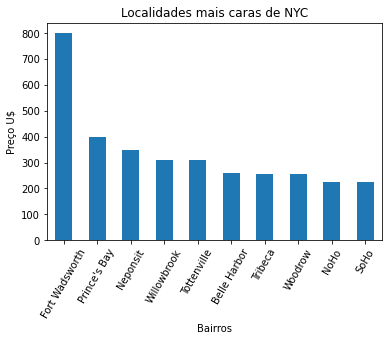

neighbourhood
Fort Wadsworth    800.000000
Prince's Bay      397.500000
Neponsit          350.000000
Willowbrook       309.000000
Tottenville       309.000000
Belle Harbor      258.500000
Tribeca           257.842105
Woodrow           255.000000
NoHo              225.102041
SoHo              224.953846
Name: price, dtype: float64


In [191]:
# plotando gráfico com localidades mais caras
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Localidades mais caras de NYC')
plt.xlabel('Bairros')
plt.ylabel('Preço U$')
plt.xticks(rotation=60)
plt.show()

print(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10])

**Problemas com a Média** 

Ao analisar as localidades que apresentam o valor médio mais elevado, apenas *Tribeca*, * NoHo* e *SoHo* são bairros de Manhattan, local que apresenta os maiores valores médios registrados, e ainda encontram-se no final da lista dos bairros mais caros.

Como podemos observar abaixo, *Fort Wadsworth* apresenta apenas um imóvel registrado, fazendo com que o seu valor médio não represente a realidade.

In [192]:
# ver as entradas de Fort Wadsworth
df_clean[df_clean.neighbourhood == 'Fort Wadsworth']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
15561,20305160,Beach House Retreat. 15 minutes from Manhattan.,1715301,Mark,Staten Island,Fort Wadsworth,40.59528,-74.06277,Entire home/apt,800,30,0,NaN,0.892762,5,365


Portanto, vamos conferir a quantidade de entradas nas localidades listadas como as mais caras, para identificar a real situação dos valores médios apresentados.


In [193]:
# Ver a quantidade de imóveis registrados nas 10 localidades consideradas mais caras
print('Quantidade de Imóveis por localidade')
print('')
print('Fort Wadsworth = ', df_clean[df_clean.neighbourhood == 'Fort Wadsworth'].shape[0])
print("Prince's Bay = ", df_clean[df_clean.neighbourhood == "Prince's Bay"].shape[0])
print('Neponsit = ', df_clean[df_clean.neighbourhood == 'Neponsit = '].shape[0])
print('Willowbrook = ', df_clean[df_clean.neighbourhood == 'Willowbrook'].shape[0])
print('Tottenville = ', df_clean[df_clean.neighbourhood == 'Tottenville'].shape[0])
print('Belle Harbor = ', df_clean[df_clean.neighbourhood == 'Belle Harbor'].shape[0])
print('Tribeca = ', df_clean[df_clean.neighbourhood == 'Tribeca'].shape[0])
print('Woodrow = ', df_clean[df_clean.neighbourhood == 'Woodrow'].shape[0])
print('NoHo = ', df_clean[df_clean.neighbourhood == 'NoHo'].shape[0])
print('SoHo = ', df_clean[df_clean.neighbourhood == 'SoHo'].shape[0])

Quantidade de Imóveis por localidade

Fort Wadsworth =  1
Prince's Bay =  2
Neponsit =  0
Willowbrook =  1
Tottenville =  1
Belle Harbor =  4
Tribeca =  152
Woodrow =  1
NoHo =  49
SoHo =  260


Como podemos observar, as localidades mais caras apresentadas apresentam quantidades relativamente baixas de imóveis registrados, exceto por *Tribeca* e *SoHo* e até *NoHo* que possuem uma quantidade mais elevada de entradas. 

Sendo assim, vamos analisar as localidades mais caras apena do distrito de *Manhattan*.

In [194]:
#criando variável para cada distrito
manhattan= df_clean.loc[df_clean["neighbourhood_group"] == "Manhattan"]
brooklyn = df_clean.loc[df_clean["neighbourhood_group"] == 'Brooklyn']
staten_island = df_clean.loc[df_clean['neighbourhood_group'] == 'Staten Island']
queens = df_clean.loc[df_clean['neighbourhood_group'] == 'Queens']
bronx = df_clean.loc[df_clean['neighbourhood_group'] == 'Bronx']

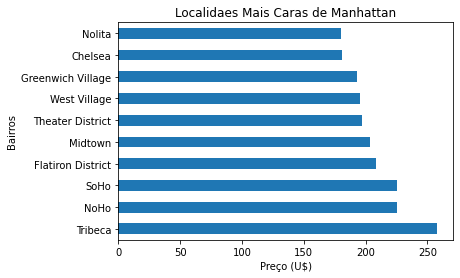

neighbourhood
Tribeca              257.842105
NoHo                 225.102041
SoHo                 224.953846
Flatiron District    208.587302
Midtown              203.751453
Theater District     197.152482
West Village         195.546552
Greenwich Village    192.785124
Chelsea              181.215980
Nolita               180.206030
Name: price, dtype: float64


In [195]:
# Plotando gráfico das localidades mais caras de Manhattan
manhattan.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].plot(kind='barh')
plt.title('Localidaes Mais Caras de Manhattan')
plt.ylabel('Bairros')
plt.xlabel('Preço (U$)')
plt.show()

print(manhattan.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10])


Como podemos observar, as 5 localidades mais caras apresentam valores médios acima de 200,00 dólares a diária.

Agora vamos seguir no caminho inverso, e procurar pelas localidades mais baratas, porém também dentro de *Manhattan*, uma vez que lá se encontra a maior parte dos pontos turísticos da cidade de Nova Iorque. 

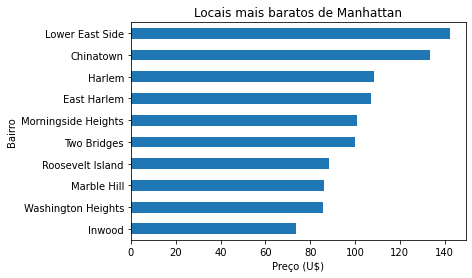

neighbourhood
Inwood                  73.652941
Washington Heights      85.739933
Marble Hill             86.222222
Roosevelt Island        88.333333
Two Bridges            100.076923
Morningside Heights    100.935897
East Harlem            106.997097
Harlem                 108.250799
Chinatown              133.660517
Lower East Side        142.284195
Name: price, dtype: float64


In [196]:
# plotando gráfico das localidades mais baratas de Manhattan
manhattan.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[:10].plot(kind='barh')
plt.title("Locais mais baratos de Manhattan")
plt.xlabel('Preço (U$)')
plt.ylabel("Bairro")
plt.show()

print(manhattan.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[:10])

É possível se hospedar em *Manhattan* sem comprometer a maior parte do orçamento da viagem apenas na hospedagem. *Nova Iorque* tem uma linha de metrô bem extensa, permitindo ir de ponta a ponta na ilha de *Manhattan* em poucos minutos. Sair da Times Square e chegar até o Brooklyn fazendo poucas conexões.

## Distribuição dos Imóveis por distrito

Nosso DataSet contem mais de 35 mil entradas, dividios em 5 distritos. Sendo assim vamos conferir qual o percentual de imóveis registrados para cada um deles.

In [197]:
print('Manhattan: {:.4f}%'.format(((manhattan.shape[0]) / df_clean.shape[0])*100))
print('Brooklyn: {:.4f}%'.format((brooklyn.shape[0] / df_clean.shape[0])*100))
print('Staten Island: {:.4f}%'.format((staten_island.shape[0] / df_clean.shape[0])*100))
print('Queens: {:.4f}%'.format((queens.shape[0] / df_clean.shape[0])*100))
print('Bronx: {:.4f}%'.format((bronx.shape[0] / df_clean.shape[0])*100))

Manhattan: 44.4598%
Brooklyn: 39.4655%
Staten Island: 0.7664%
Queens: 12.7093%
Bronx: 2.5990%


## Distribuição dos Imóveis através das Coordenadas Geográficas

Ao plotar um gráfico com as informações de *Latitude* e *Longitude*, podemos gerar um mapa do local, diferenciando a variação de preço de cada imóvel registrado.

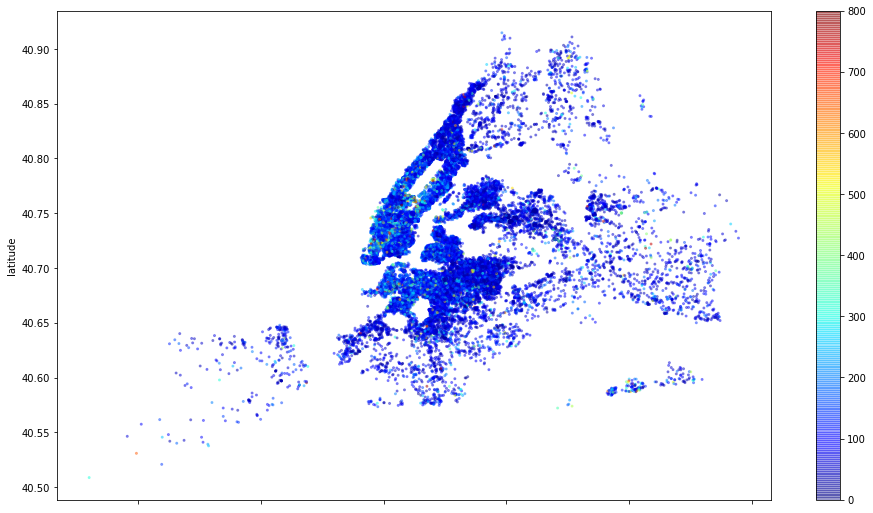

In [221]:
# plotando gráfico com Latitude e Longitude
df_clean.plot(kind='scatter', x ='longitude', y = 'latitude', alpha=0.4, c =df_clean['price'], s=4, cmap=plt.get_cmap('jet'), figsize=(16,9));

A cidade de Nova Iorque possui uma área de 783 quilômetros quadrados, portanto o mapa não se torna tão nítido nesta visualização.

Sendo assim vamos plotar novamente, mas somente a área de *Manhattan* que possui apenas 59 quilômetros quadrados.

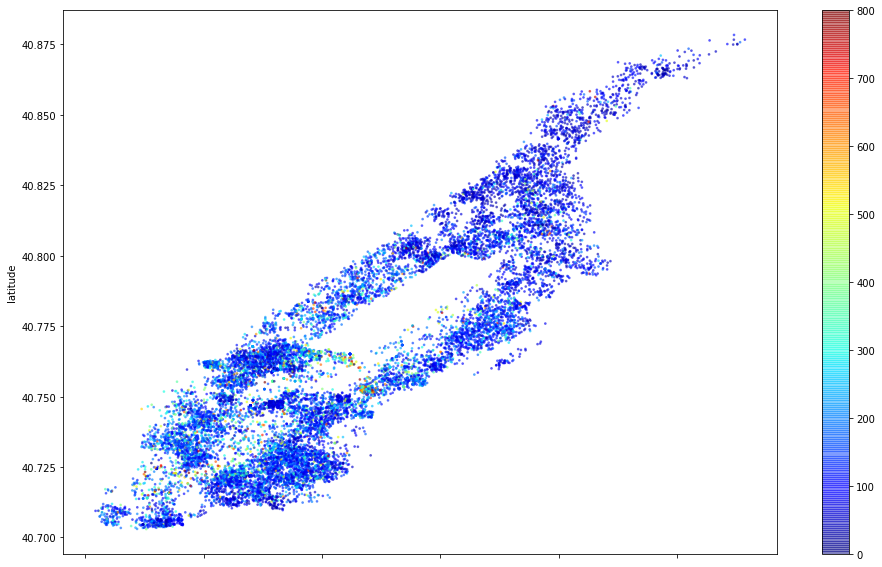

In [220]:
# plotando gráfico de latitude e longitude de Manhattan
manhattan.plot(kind='scatter', x ='longitude', y = 'latitude', alpha=0.5, c =manhattan['price'], s=3, cmap=plt.get_cmap('jet'), figsize=(16,10));

## Média de noites mínimas dos imóveis para aluguel

Vamos analisar qual a média do tempo mínimo de noites que os viajantes ficam na cidade.

In [201]:
# ver a média da coluna minimum_nights
df_clean['minimum_nights'].mean()

21.333738687782805

In [213]:
# ver a média da coluna minimum_nights de cada distrito
print('Manhattan: {:.1f} noites'.format(manhattan['minimum_nights'].mean()))
print('Brookly: {:.1f} noites'.format(brooklyn['minimum_nights'].mean()))
print('Staten Island: {:.1f} noites'.format(staten_island['minimum_nights'].mean()))
print('Queens: {:.1f} noites'.format(queens['minimum_nights'].mean()))
print('Bronx: {:.1f} noites'.format(bronx['minimum_nights'].mean()))

Manhattan: 22.7 noites
Brookly: 20.9 noites
Staten Island: 14.0 noites
Queens: 19.2 noites
Bronx: 16.1 noites


Ao analisar média de noites em todo o DataSet, observa-se que pessoas que buscam um lugar para ficar em Nova Iorque pelo Airbnb, pretendem ficar na cidade por um período mais longo, uma vez que custear um hotel por mais que duas semanas, se torna uma alternativa cara e inválida.  